## Housing data

*modules*

In [24]:
import pandas as pd

import numpy as np

import os

import tarfile

from six.moves import urllib

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = download_root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url,housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data(HOUSING_URL,HOUSING_PATH)

In [13]:
print(housing_path)

datasets\housing


In [14]:
tgz_path = os.path.join(housing_path, "housing.tgz")
# urllib.request.urlretrieve(housing_url, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=housing_path)
housing_tgz.close()

In [15]:
housing_df = pd.read_csv('datasets/housing/housing.csv')   

In [17]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Determine the number of bins for histogram

In [28]:
np.sqrt(housing_df.shape[0])

143.66627996854376

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'median_income'}>]], dtype=object)

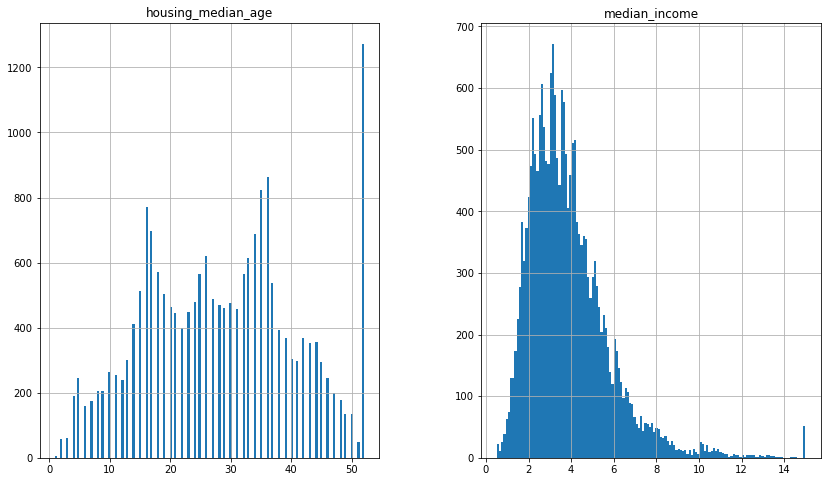

In [34]:
housing_df[['housing_median_age','median_income']].hist(bins=140, figsize=(14,8))

*Function for creating train test split function*

In [42]:
def split_train_test(data, test_ratio):    
    np.random.seed(42)
    shuffled_indicies = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    train_indicies = shuffled_indicies[test_set_size:]
    test_indicies = shuffled_indicies[:test_set_size]
    return data.iloc[train_indicies], data.iloc[test_indicies]

In [43]:
train_df, test_df = split_train_test(housing_df, 0.3)

In [44]:
train_df.shape

(14448, 10)

In [45]:
test_df.shape

(6192, 10)